<a href="https://colab.research.google.com/github/Prajwal011/LLM-s/blob/main/Huggingface_models_in_langchain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Install Required Packages
Ensure that you have the necessary packages installed by running the following command:

In [3]:
! pip install -q transformers langchain langchain_community


Step 2: Set Up Environment
Make sure you have a Hugging Face Access Token saved as an environment variable HUGGINGFACEHUB_API_TOKEN.



Step 3: Instantiate an LLM
Choose one of the options to instantiate the LLM based on your preference:

Option 1: HuggingFaceTextGenInference


In [ ]:
from langchain_community.llms import HuggingFaceTextGenInference
import os

ENDPOINT_URL = "<YOUR_ENDPOINT_URL_HERE>"
HF_TOKEN = os.getenv("HUGGINGFACEHUB_API_TOKEN")

llm = HuggingFaceTextGenInference(
    inference_server_url=ENDPOINT_URL,
    max_new_tokens=512,
    top_k=50,
    temperature=0.1,
    repetition_penalty=1.03,
    server_kwargs={
        "headers": {
            "Authorization": f"Bearer {HF_TOKEN}",
            "Content-Type": "application/json",
        }
    },
)

Option 2: HuggingFaceEndpoint


In [ ]:
from langchain_community.llms import HuggingFaceEndpoint

ENDPOINT_URL = "<YOUR_ENDPOINT_URL_HERE>"
llm = HuggingFaceEndpoint(
    endpoint_url=ENDPOINT_URL,
    task="text-generation",
    model_kwargs={
        "max_new_tokens": 512,
        "top_k": 50,
        "temperature": 0.1,
        "repetition_penalty": 1.03,
    },


Option 3: HuggingFaceHub


In [ ]:
from langchain_community.llms import HuggingFaceHub

llm = HuggingFaceHub(
    repo_id="HuggingFaceH4/zephyr-7b-beta",
    task="text-generation",
    model_kwargs={
        "max_new_tokens": 512,
        "top_k": 30,
        "temperature": 0.1,
        "repetition_penalty": 1.03,
    },
)

Option 4: HuggingFacePipeline

Using from_model_id Method

You can load a model by specifying the model ID and task using the from_model_id method.

In [4]:
from langchain_community.llms.huggingface_pipeline import HuggingFacePipeline

llm = HuggingFacePipeline.from_model_id(
    model_id="gpt2",
    task="text-generation",
    pipeline_kwargs={"max_new_tokens": 10},
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

Option 5: HuggingFacePipeline

Passing an Existing Transformers Pipeline Directly

Alternatively, you can create an existing transformers pipeline and pass it directly to the HuggingFacePipeline constructor.

In [ ]:
from langchain_community.llms.huggingface_pipeline import HuggingFacePipeline
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline

model_id = "gpt2"
tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForCausalLM.from_pretrained(model_id)
pipe = pipeline("text-generation", model=model, tokenizer=tokenizer, max_new_tokens=10)

llm = HuggingFacePipeline(pipeline=pipe)

To run models

In [5]:
llm.invoke("Hi how are you?")

'Hi how are you? I guess the only things that I know the answer'

### Quick overview For each function

**HuggingFaceHub**

Purpose: Access and manage models, datasets, and transformers on the Hugging Face Hub.

Functionality: Download, upload, and version control models, datasets, and transformers.

Use Case: Primarily used for model and dataset management, not for direct inference.

**HuggingFacePipeline**

Purpose: Provides a high-level interface for common NLP tasks using pre-trained models.

Functionality: Handles tokenization, model loading, and post-processing for tasks like text generation, summarization, question answering, etc.

Use Case: Ideal for quick prototyping and experimentation with pre-trained models.

**HuggingFaceEndpoint**

Purpose: Offers low-level access to a Hugging Face model deployed as an endpoint.

Functionality: Allows direct interaction with a model deployed on the Hugging
Face Inference API.

Use Case: Useful for advanced users who need granular control over model inputs and outputs, or for deploying custom models as endpoints.

**HuggingFaceTextGenInference**

Purpose: Specifically designed for text generation tasks using Hugging Face models.

Functionality: Provides tools for generating text using Hugging Face models, including control over generation parameters like temperature, top_p, etc.

Use Case: Best suited for text generation tasks where fine-grained control over the generation process is required.


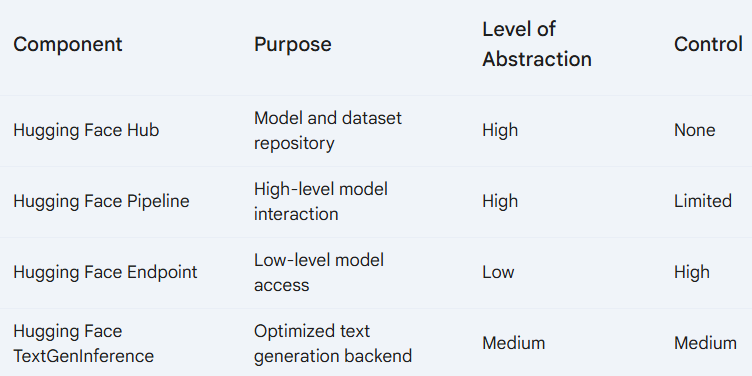